In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("colorectal_cancer_dataset.csv")

In [3]:
df.head()


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [6]:
df.shape

(167497, 28)

In [8]:
from sklearn.preprocessing import LabelEncoder
object_cols = tuple(
    col for col in df.columns
    if df[col].dtype == 'object'
)

label_encoders = {}

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [9]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,14,77,1,0,69,0,0,1,2,...,1,0,54413,50,5,1,0,2,0,1
1,2,14,59,1,0,33,0,0,0,2,...,1,0,76553,37,25,1,1,0,1,1
2,3,8,66,1,2,17,0,1,0,0,...,1,0,62805,54,27,1,0,2,1,0
3,4,15,83,1,2,14,0,0,0,1,...,1,0,89393,45,11,1,0,2,0,1
4,5,4,66,1,0,34,0,1,0,0,...,1,0,66425,15,27,1,1,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Patient_ID                  167497 non-null  int64
 1   Country                     167497 non-null  int64
 2   Age                         167497 non-null  int64
 3   Gender                      167497 non-null  int64
 4   Cancer_Stage                167497 non-null  int64
 5   Tumor_Size_mm               167497 non-null  int64
 6   Family_History              167497 non-null  int64
 7   Smoking_History             167497 non-null  int64
 8   Alcohol_Consumption         167497 non-null  int64
 9   Obesity_BMI                 167497 non-null  int64
 10  Diet_Risk                   167497 non-null  int64
 11  Physical_Activity           167497 non-null  int64
 12  Diabetes                    167497 non-null  int64
 13  Inflammatory_Bowel_Disease  167497 non-null 

In [11]:
# Identifier
identifier_cols = ['Patient_ID']

# Target
target_col = 'Survival_5_years'

# Demographic variables
demographic_cols = [
    'Age', 'Gender', 'Urban_or_Rural', 'Country'
]

# Clinical / Biological variables
clinical_cols = [
    'Cancer_Stage', 'Tumor_Size_mm', 'Family_History',
    'Genetic_Mutation', 'Diabetes', 'Inflammatory_Bowel_Disease'
]

# Lifestyle / Behavioral variables
lifestyle_cols = [
    'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI',
    'Diet_Risk', 'Physical_Activity'
]

# Screening & Early detection
screening_cols = [
    'Screening_History', 'Early_Detection'
]

# Treatment & cost
treatment_cols = [
    'Treatment_Type', 'Healthcare_Costs'
]

# Socioeconomic / system-level
socioeconomic_cols = [
    'Economic_Classification', 'Healthcare_Access',
    'Insurance_Status', 'Incidence_Rate_per_100K'
]


In [13]:
feature_cols = (
    demographic_cols +
    clinical_cols +
    lifestyle_cols +
    screening_cols +
    treatment_cols +
    socioeconomic_cols
)
exclude_from_modeling = [
    'Patient_ID',
    'Country',
    'Mortality',
    'Mortality_Rate_per_100K'
]


In [14]:
X = df.drop(columns=exclude_from_modeling + [target_col])
y = df[target_col]
print("Number of features:", X.shape[1])
print("Target distribution:\n", y.value_counts(normalize=True))


Number of features: 23
Target distribution:
 Survival_5_years
1    0.599336
0    0.400664
Name: proportion, dtype: float64


In [15]:
numerical_cols = [
    'Age', 'Tumor_Size_mm', 'Obesity_BMI',
    'Healthcare_Costs', 'Incidence_Rate_per_100K'
]

# Categorical / binary / ordinal
categorical_cols = [
    col for col in X.columns if col not in numerical_cols
]

In [16]:
num_summary = X[numerical_cols].describe().T
num_summary['IQR'] = num_summary['75%'] - num_summary['25%']
num_summary


,count,mean,std,min,25%,50%,75%,max,IQR
Age,167497.0,69.200780,11.872470,30.0,59.0,69.0,79.0,89.0,20.0
Tumor_Size_mm,167497.0,42.005708,21.672206,5.0,23.0,42.0,61.0,79.0,38.0
Obesity_BMI,167497.0,1.101363,0.830895,0.0,0.0,1.0,2.0,2.0,2.0
Healthcare_Costs,167497.0,72452.168099,27402.779597,25000.0,48760.0,72344.0,96227.0,119999.0,47467.0
Incidence_Rate_per_100K,167497.0,34.531562,14.447970,10.0,22.0,35.0,47.0,59.0,25.0


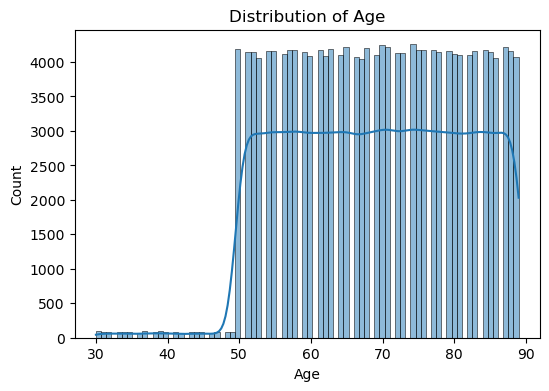

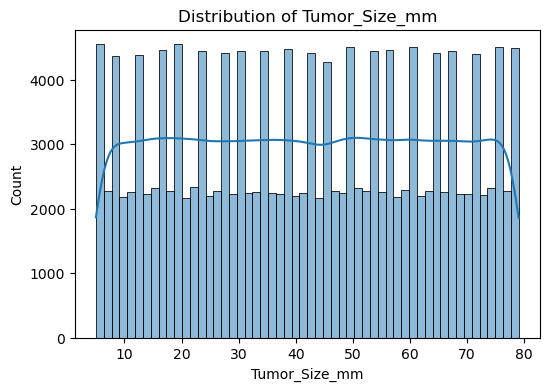

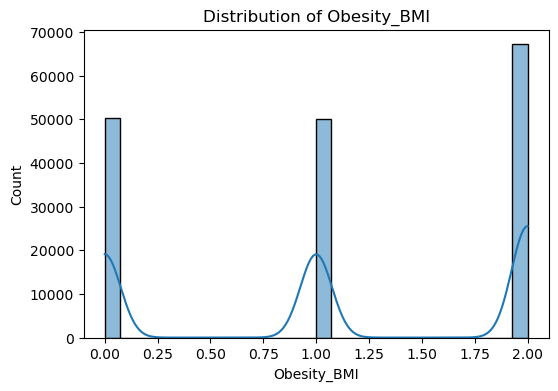

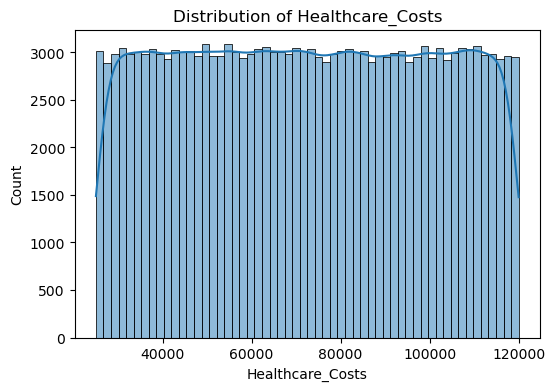

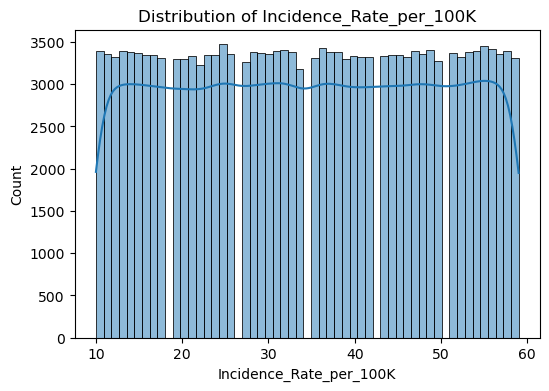

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

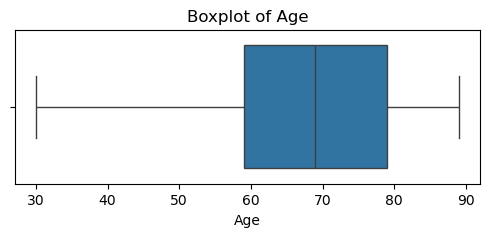

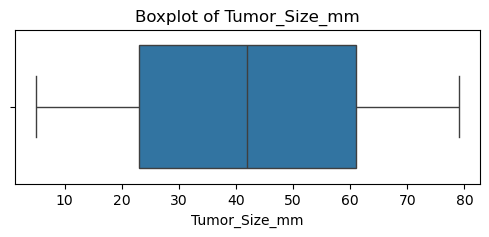

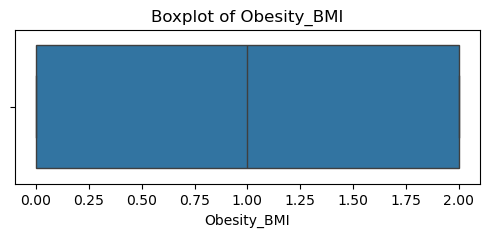

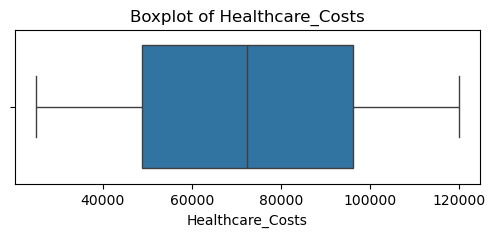

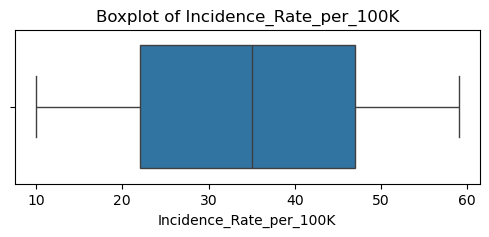

In [18]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [19]:
cat_summary = {}

for col in categorical_cols:
    cat_summary[col] = X[col].value_counts(normalize=True)

cat_summary


{'Gender': Gender
 1    0.601121
 0    0.398879
 Name: proportion, dtype: float64,
 'Cancer_Stage': Cancer_Stage
 2    0.399894
 0    0.398807
 1    0.201299
 Name: proportion, dtype: float64,
 'Family_History': Family_History
 0    0.699619
 1    0.300381
 Name: proportion, dtype: float64,
 'Smoking_History': Smoking_History
 0    0.597867
 1    0.402133
 Name: proportion, dtype: float64,
 'Alcohol_Consumption': Alcohol_Consumption
 1    0.500648
 0    0.499352
 Name: proportion, dtype: float64,
 'Diet_Risk': Diet_Risk
 2    0.500731
 0    0.300274
 1    0.198995
 Name: proportion, dtype: float64,
 'Physical_Activity': Physical_Activity
 2    0.400139
 1    0.301325
 0    0.298537
 Name: proportion, dtype: float64,
 'Diabetes': Diabetes
 0    0.799662
 1    0.200338
 Name: proportion, dtype: float64,
 'Inflammatory_Bowel_Disease': Inflammatory_Bowel_Disease
 0    0.899783
 1    0.100217
 Name: proportion, dtype: float64,
 'Genetic_Mutation': Genetic_Mutation
 0    0.851263
 1    0.148

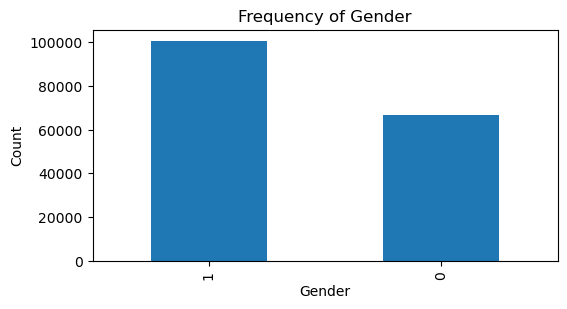

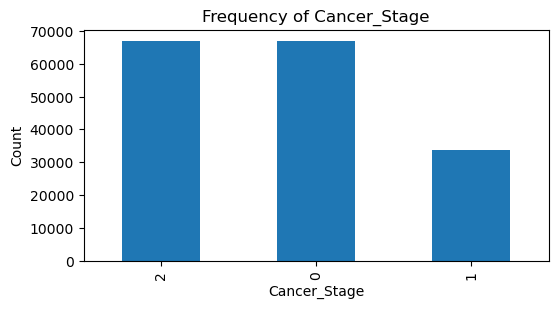

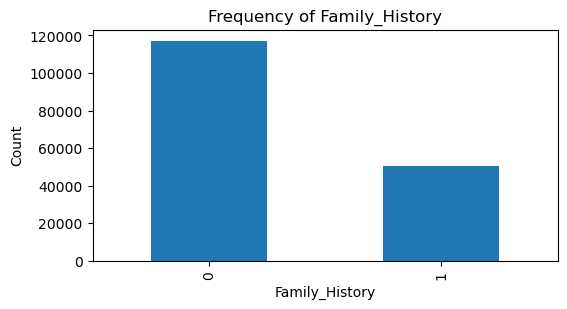

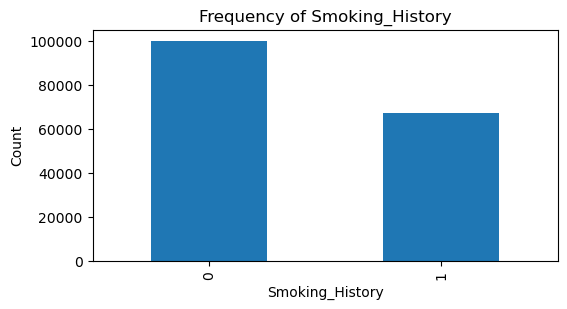

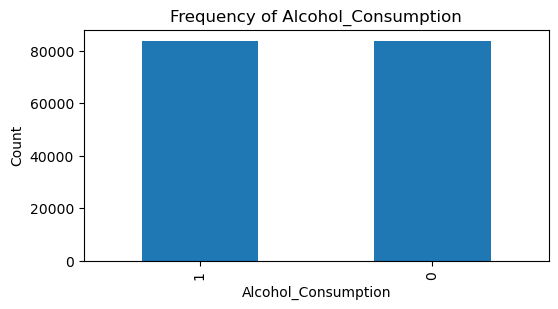

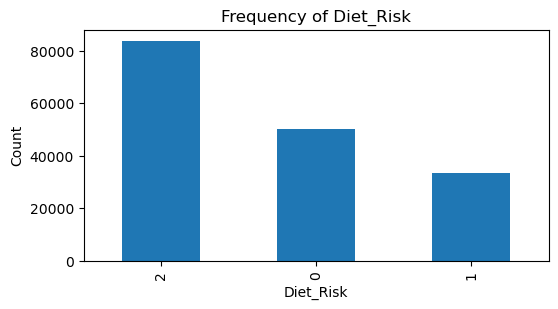

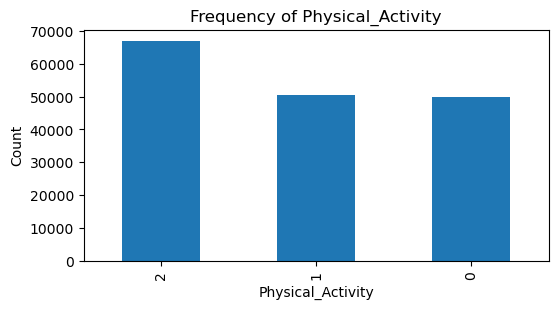

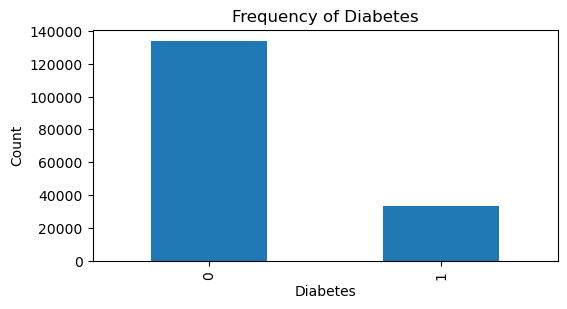

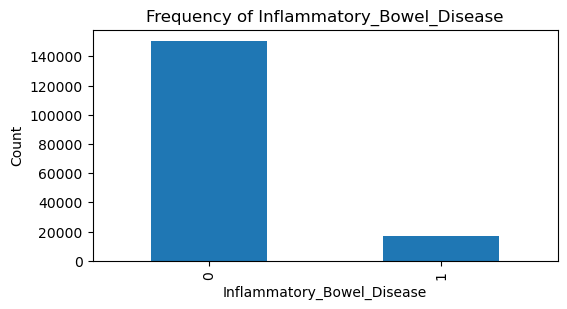

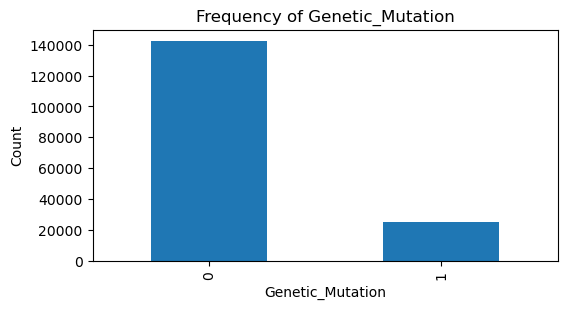

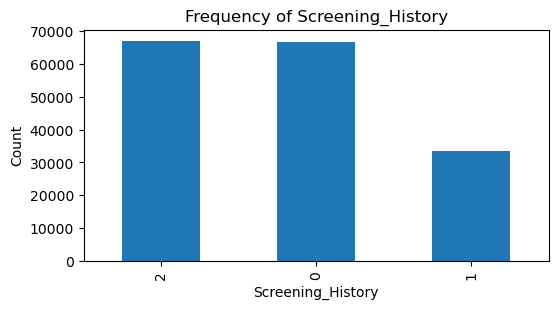

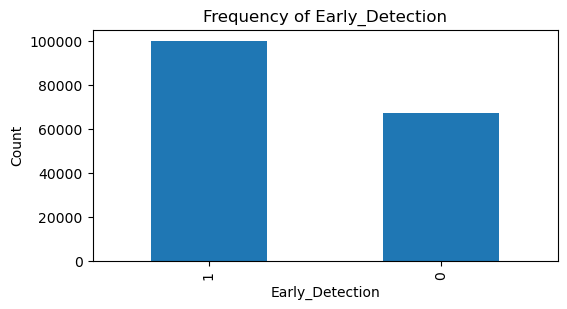

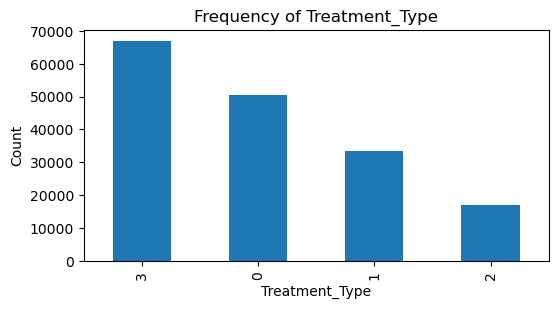

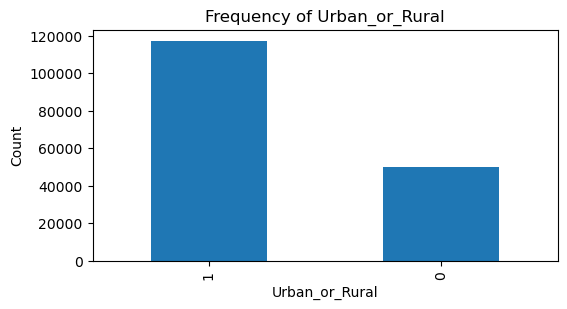

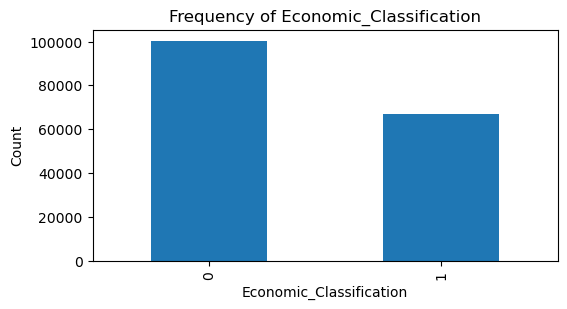

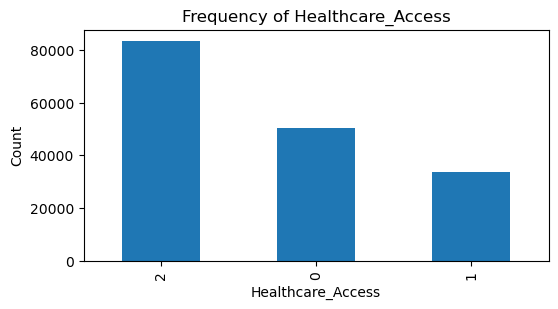

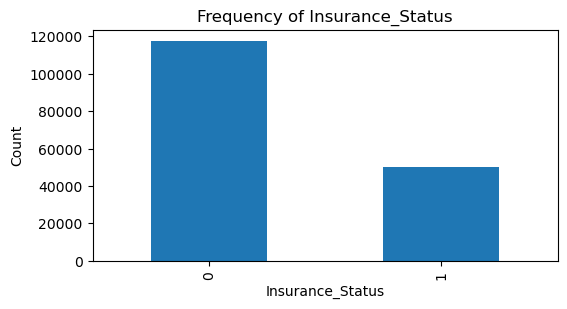

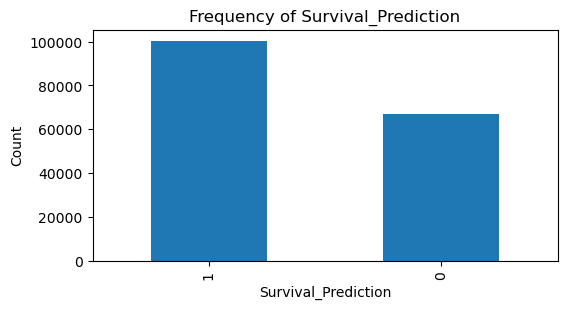

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    X[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.ylabel('Count')
    plt.show()


In [21]:
y.value_counts()

Survival_5_years
1    100387
0     67110
Name: count, dtype: int64

In [22]:
from scipy.stats import chi2_contingency

chi_square_results = {}

for col in categorical_cols:
    table = pd.crosstab(X[col], y)
    chi2, p, _, _ = chi2_contingency(table)
    chi_square_results[col] = p

pd.Series(chi_square_results).sort_values()


Family_History                0.044314
Survival_Prediction           0.101378
Alcohol_Consumption           0.142586
Screening_History             0.161923
Insurance_Status              0.181035
Urban_or_Rural                0.203267
Diet_Risk                     0.348708
Early_Detection               0.548823
Economic_Classification       0.576210
Diabetes                      0.582080
Smoking_History               0.599651
Healthcare_Access             0.622836
Gender                        0.685687
Treatment_Type                0.769966
Cancer_Stage                  0.784677
Genetic_Mutation              0.896983
Physical_Activity             0.958034
Inflammatory_Bowel_Disease    0.960854
dtype: float64

In [24]:
numeric_features = X.select_dtypes(include='number')
numeric_features.shape


(167497, 23)

In [25]:
corr_matrix = numeric_features.corr()
corr_matrix


,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,Physical_Activity,...,Screening_History,Early_Detection,Treatment_Type,Healthcare_Costs,Incidence_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
Age,1.000000,-0.000658,-0.003536,-0.003226,0.001706,-0.001982,0.000728,-0.001118,0.002539,-0.007140,...,-0.002304,0.004034,0.000936,0.003813,0.000367,-0.001720,-0.004146,-0.000056,-0.000046,-0.001882
Gender,-0.000658,1.000000,-0.000592,-0.005163,-0.001655,-0.005424,0.003506,0.001528,-0.001611,-0.001512,...,-0.000575,-0.003095,-0.002130,-0.002682,-0.001597,0.001379,0.001138,-0.002993,0.003613,0.000751
Cancer_Stage,-0.003536,-0.000592,1.000000,-0.000334,-0.001176,0.000134,0.006759,-0.001805,0.002692,0.001035,...,0.003418,0.001159,-0.001553,-0.001979,-0.006511,0.002531,-0.000640,-0.001611,0.000551,-0.002129
Tumor_Size_mm,-0.003226,-0.005163,-0.000334,1.000000,-0.004278,0.002439,-0.000193,-0.003605,0.000889,0.002767,...,0.001501,-0.002431,-0.001700,-0.000765,-0.000487,-0.000431,0.000543,-0.001018,-0.001012,-0.003249
Family_History,0.001706,-0.001655,-0.001176,-0.004278,1.000000,0.001395,0.001274,-0.000688,-0.003846,-0.001333,...,-0.002287,-0.000990,-0.000579,0.004884,-0.000914,-0.002249,0.002376,0.002227,0.005031,0.001158
Smoking_History,-0.001982,-0.005424,0.000134,0.002439,0.001395,1.000000,-0.004691,-0.001442,0.001214,-0.003867,...,-0.001415,-0.001535,0.003151,-0.000604,0.005524,0.002799,0.000543,-0.000536,-0.003703,-0.001019
Alcohol_Consumption,0.000728,0.003506,0.006759,-0.000193,0.001274,-0.004691,1.000000,0.003420,0.001660,-0.002476,...,0.002140,-0.001412,-0.005158,-0.001879,-0.002149,0.003715,0.002863,0.003534,-0.006978,0.002789
Obesity_BMI,-0.001118,0.001528,-0.001805,-0.003605,-0.000688,-0.001442,0.003420,1.000000,0.003696,0.002260,...,0.002991,-0.001094,0.004371,-0.001094,-0.001704,-0.000567,0.003614,-0.000037,-0.002364,0.000783
Diet_Risk,0.002539,-0.001611,0.002692,0.000889,-0.003846,0.001214,0.001660,0.003696,1.000000,-0.000292,...,-0.000947,0.003423,-0.000190,-0.001535,-0.000130,-0.005589,-0.004703,-0.001307,0.001052,-0.000088
Physical_Activity,-0.007140,-0.001512,0.001035,0.002767,-0.001333,-0.003867,-0.002476,0.002260,-0.000292,1.000000,...,-0.001656,-0.000376,0.000194,0.002466,-0.001560,0.000061,0.001182,-0.001647,-0.002539,0.002708


In [28]:
high_corr_pairs = (
    corr_matrix.abs()
    .unstack()
    .sort_values(ascending=False)
)

high_corr_pairs = high_corr_pairs[
    (high_corr_pairs < 1.0) & (high_corr_pairs > 0.8)
]

high_corr_pairs


Series([], dtype: float64)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features.columns
vif_data['VIF'] = [
    variance_inflation_factor(numeric_features.values, i)
    for i in range(numeric_features.shape[1])
]

vif_data.sort_values('VIF', ascending=False)


,Feature,VIF
0,Age,18.775459
16,Healthcare_Costs,7.241019
17,Incidence_Rate_per_100K,6.196736
3,Tumor_Size_mm,4.504725
18,Urban_or_Rural,3.237775
8,Diet_Risk,2.820654
20,Healthcare_Access,2.815379
9,Physical_Activity,2.693080
7,Obesity_BMI,2.691402
15,Treatment_Type,2.504101


In [35]:
redundant_features = [
    'Incidence_Rate_per_100K'
]

X_reduced = X.drop(columns=redundant_features)

numeric_reduced = X_reduced.select_dtypes(include='number')

vif_after = pd.DataFrame()
vif_after['Feature'] = numeric_reduced.columns
vif_after['VIF'] = [
    variance_inflation_factor(numeric_reduced.values, i)
    for i in range(numeric_reduced.shape[1])
]

vif_after.sort_values('VIF', ascending=False)



,Feature,VIF
0,Age,17.418559
16,Healthcare_Costs,7.173064
3,Tumor_Size_mm,4.483990
17,Urban_or_Rural,3.228523
8,Diet_Risk,2.814523
19,Healthcare_Access,2.810020
9,Physical_Activity,2.687622
7,Obesity_BMI,2.686337
15,Treatment_Type,2.498995
1,Gender,2.448783


In [37]:
X_model= X_reduced.copy() if 'X_reduced' in globals() else X.copy()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_model, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.49      0.00      0.01     13422
           1       0.60      1.00      0.75     20078

    accuracy                           0.60     33500
   macro avg       0.55      0.50      0.38     33500
weighted avg       0.56      0.60      0.45     33500

ROC-AUC: 0.5015022621729064


In [40]:
feature_importance = pd.DataFrame({
    'Feature': X_model.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
16,Healthcare_Costs,0.192991
3,Tumor_Size_mm,0.157869
0,Age,0.144679
15,Treatment_Type,0.046302
9,Physical_Activity,0.039905
7,Obesity_BMI,0.038669
2,Cancer_Stage,0.038398
19,Healthcare_Access,0.037292
8,Diet_Risk,0.036127
13,Screening_History,0.036026


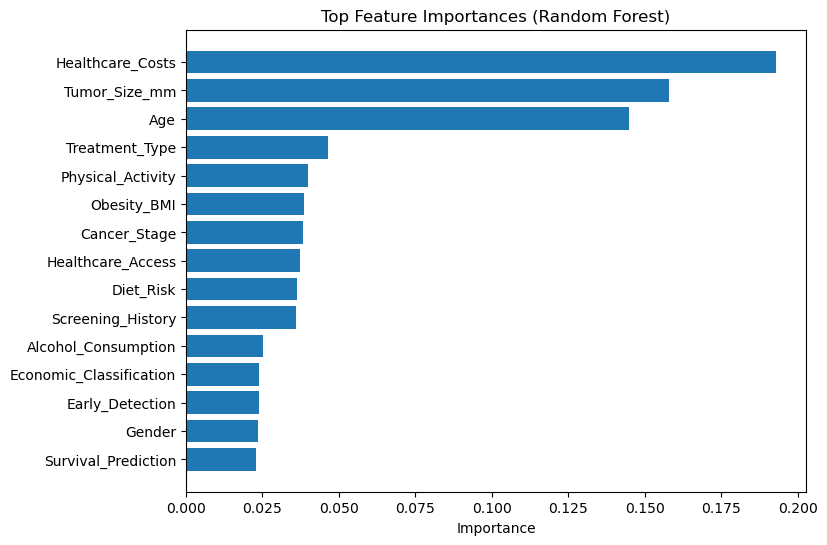

In [41]:
top_n = 15

plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance['Feature'][:top_n][::-1],
    feature_importance['Importance'][:top_n][::-1]
)
plt.xlabel('Importance')
plt.title('Top Feature Importances (Random Forest)')
plt.show()


In [42]:
top_features = feature_importance['Feature'].head(12).tolist()

X_selected = X_model[top_features]
